In [1]:
import numpy as np 
import pandas as pd 
import os
import scipy.stats as ss
from collections import Counter
import math 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# removes Gridlines
sns.set(style="ticks")


In [ ]:
##Importing files from the computer when using google colab
from google.colab import files
uploaded = files.upload()

Saving FIFA2019.csv to FIFA2019.csv


In [2]:
#https://github.com/4m4n5/fifa18-all-player-statistics
data = pd.read_csv("FIFA2019.csv") #load the dataset

In [3]:
##############################Data pre-processing##############################

In [4]:
#numeric and categorical features

numeric= ['Overall', 'Crossing','Finishing',  'ShortPassing',  'Dribbling','LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility',  'Stamina','Volleys','FKAccuracy','Reactions','Balance','ShotPower','Strength','LongShots','Aggression','Interceptions']
categorical= ['Preferred Foot','Position','Body Type','Nationality','Weak Foot']

In [5]:
data = data[numeric+categorical] #add numeric and categorical features to the dataframe

In [6]:
#Convert categorical variable into dummy/indicator variables using pd.get_dummies

train_data = pd.concat([data[numeric], pd.get_dummies(data[categorical])],axis=1)
features = train_data.columns #save the column names in features

train_data = train_data.dropna() #Remove missing values

In [7]:
train_data = pd.DataFrame(train_data,columns=features) #convert train_data to dataframe

In [ ]:
y = train_data['Overall']>=87 #select labels where overall rating is >=87
X = train_data.copy()
del X['Overall']
X.head()

,Crossing,Finishing,ShortPassing,Dribbling,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Stamina,...,Nationality_Uganda,Nationality_Ukraine,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe
0,84.0,95.0,90.0,97.0,87.0,96.0,91.0,86.0,91.0,72.0,...,0,0,0,0,0,0,0,0,0,0
1,84.0,94.0,81.0,88.0,77.0,94.0,89.0,91.0,87.0,88.0,...,0,0,0,0,0,0,0,0,0,0
2,79.0,87.0,84.0,96.0,78.0,95.0,94.0,90.0,96.0,81.0,...,0,0,0,0,0,0,0,0,0,0
3,17.0,13.0,50.0,18.0,51.0,42.0,57.0,58.0,60.0,43.0,...,0,0,0,0,0,0,0,0,0,0
4,93.0,82.0,92.0,86.0,91.0,91.0,78.0,76.0,79.0,90.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
########################Feature selection################################

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

num_features=15

X_norm = MinMaxScaler().fit_transform(X)#normalize using min-max scaler

chi_selector = SelectKBest(chi2, k=num_features) #apply chi2
best= chi_selector.fit(X_norm, y) #fit

scores = pd.DataFrame(best.scores_)
data_col = pd.DataFrame(X.columns)

#concat two dataframes 
featureScores = pd.concat([data_col,scores],axis=1)
featureScores.columns = ['Feature_Names','Score']  #naming the dataframe columns
print(featureScores.nlargest(num_features,'Score'))  #print 15 best features

                     Feature_Names       Score
50            Body Type_C. Ronaldo  329.163636
51              Body Type_Courtois  329.163636
53                 Body Type_Messi  329.163636
54                Body Type_Neymar  329.163636
56   Body Type_PLAYER_BODY_TYPE_25  329.163636
33                     Position_LF   84.344531
43                     Position_RF   78.828125
72             Nationality_Belgium   34.781276
195           Nationality_Slovenia   20.239787
115              Nationality_Gabon   20.117272
217            Nationality_Uruguay   14.437791
28                    Position_LAM   13.827564
12                       Reactions   10.964650
93          Nationality_Costa Rica    9.123953
103              Nationality_Egypt    8.770898


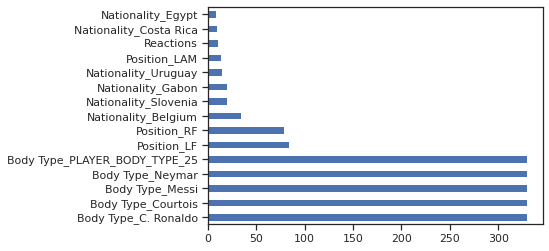

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(best.scores_, index=X.columns)
feat_importances.nlargest(num_features).plot(kind='barh')
plt.show()

# Hands-on Exercise 1:
    
Perform feature selection for the same dataset using Recursive Feature Elimination method